# Whale Analysis

In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
from pandas_datareader import data
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
%matplotlib inline

C:\Users\markf\anaconda3\envs\dev\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")

In [3]:
# Pass csv file into pandas dataframe, set index as "Date"
whale_df = pd.read_csv(whale_returns_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls and check the remaining nulls have been eliminated
whale_df.dropna(inplace = True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [6]:
# Sort index 
whale_df = whale_df.sort_index()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)

algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_df = algo_df.dropna()

In [10]:
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_history_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)

# Sort Index
sp500_df = sp500_df.sort_index(ascending = True)

sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [12]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].replace({'\$': '', ',': ''}, regex = True).astype(float)

In [14]:
# Check to see if dollar signs removed
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [15]:
sp500_df.dtypes

Close    float64
dtype: object

In [16]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [17]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [18]:
# Rename Column
sp500_daily_returns = sp500_daily_returns.rename(columns = {'Close' : 'S&P500'})
sp500_daily_returns.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [19]:
# Concatenate all DataFrames into a single DataFram
combined_df = pd.concat([whale_df, algo_df, sp500_daily_returns], axis = 'columns', join = 'inner')
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

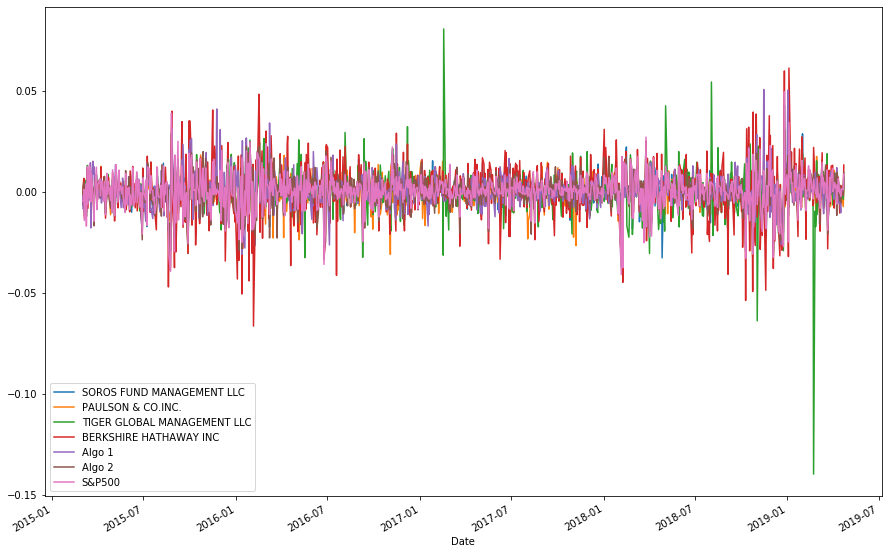

In [20]:
# Plot daily returns
combined_df.plot(figsize=(15,10))

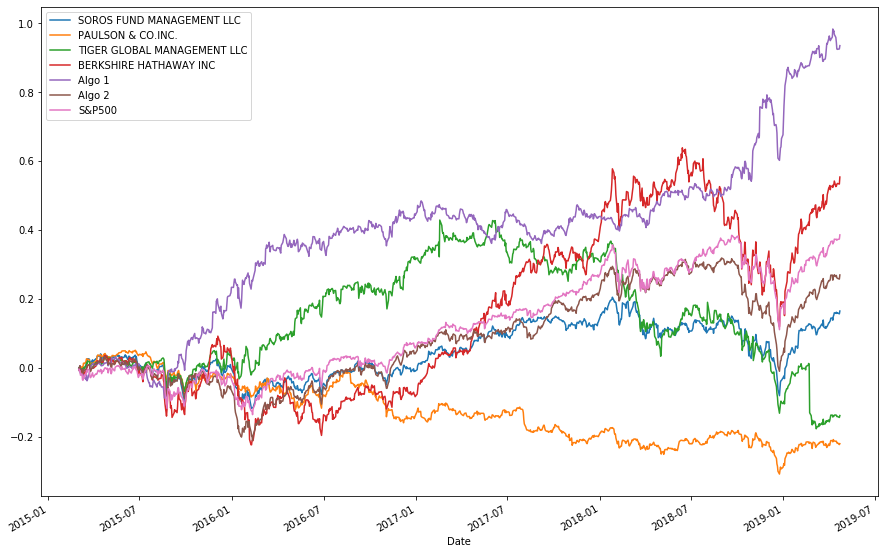

In [21]:
# Plot cumulative returns
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns.plot(figsize = (15,10))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

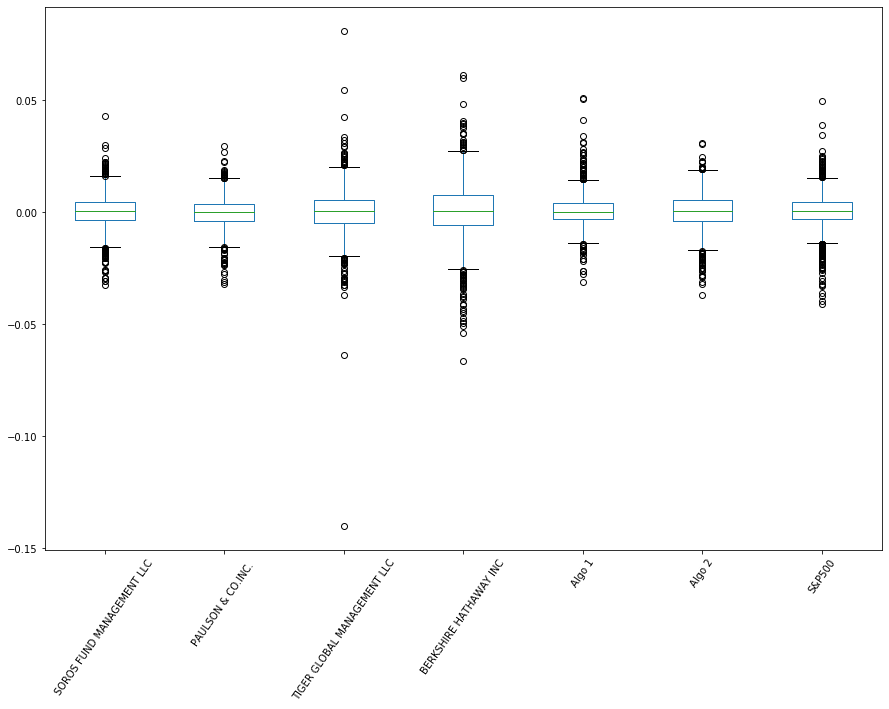

In [22]:
# Box plot to visually show risk
combined_df.boxplot(grid = False, rot = 55, figsize=(15,10))

In [23]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
df_std = combined_df.std().sort_values()
df_std

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P500                         0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [24]:
# Calculate the annualized standard deviation (252 trading days)
volitility = combined_df.std() * np.sqrt(252)
volitility.sort_values(inplace = True)
volitility

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P500                         0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

### Which portfolios are riskier than the S&P 500?

Based on the standard deviation (above) and volitility (below), two portfolios present greater risk than the index, Berkshire Hathaway and Tiger Global Management.  Each portfolio's standard deviation and volitility measures exceed that of the S&P 500 index in both cases.  However, it can be said that that each portfolio may present greater chance of higher returns than the index based on their volitility.  


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?

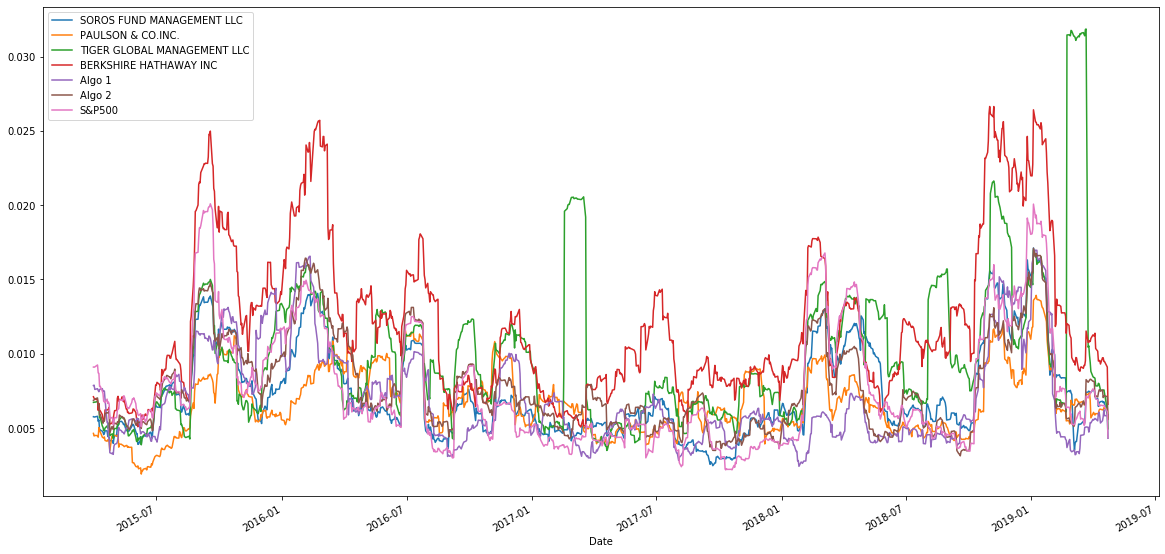

In [25]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_rolling_std = combined_df.rolling(window = 21).std().plot(figsize=(20,10))

### Response (Question 1): 

There is some correlation with the index in so far as movement, but the Berkshire Hathaway and Tiger Management portfolio still demonstrate greater swings in so far as deviations from the mean. 

In [26]:
# Construct a correlation table
returns_correlation = combined_df.corr()
returns_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


## Response (Question 2): 

The portfolios which closley mimic the index are Algo 2 and Soros Fund Management.  

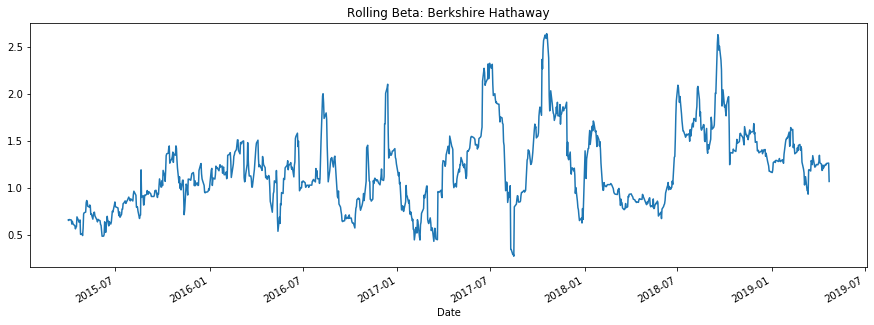

In [27]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)

# set variable for Berkshire hathaway covariance rolling 21 day window
BH_rolling_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window = 21).cov(combined_df['S&P500'])

# calculate variance of S&P 500 over same window
rolling_variance_sp500 = combined_df['S&P500'].rolling(window = 21).var()

# calculate rolling beta of Berkshire Hathaway
rolling_beta = BH_rolling_covariance / rolling_variance_sp500

# Plot beta 
rolling_beta.plot(figsize=(15, 5), title = 'Rolling Beta: Berkshire Hathaway')



### Does portfolio seem sensitive to movements of S&P 500:

The Berkshire Hathaway portoflio is highly sensitive to movements of S&P 500.


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [28]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * np.sqrt(252) / combined_df.std()).sort_values()
sharpe_ratios

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P500                         0.648267
Algo 1                         1.378648
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

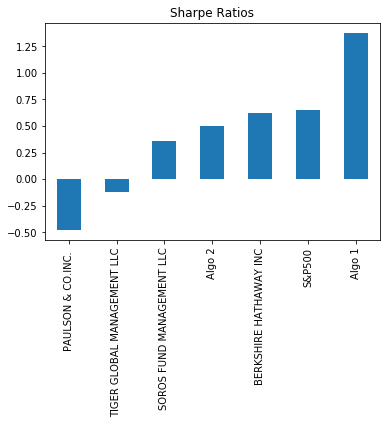

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = 'Sharpe Ratios')

### Which portfolio has the best performance:  

Based on the data, the Algo 1 portfolio is a better performer over the the remaining portfolios given it performs better than the index at a lower risk.  Algo 1 also presents stronger returns over the other portfolios.  

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# create a list of tickers to be imported into data reader from yahoo
tickers = ['COF', 'BAC', 'AXP']

# define start and end dates of the range of data
start_date = '2015-07-01'
end_date = '2019-04-30'

# use pandas_reader.data.DataReader to load ticker data
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)
panel_data.head()


Attributes  Adj Close                            Close                        \
Symbols           COF        BAC        AXP        COF        BAC        AXP   
Date                                                                           
2015-07-01  79.129791  15.827739  72.589607  88.599998  17.219999  78.400002   
2015-07-02  78.879730  15.653097  72.413666  88.320000  17.030001  78.209999   
2015-07-06  78.370636  15.570377  71.839653  87.750000  16.940001  77.589996   
2015-07-07  78.495689  15.340592  71.802620  87.889999  16.690001  77.550003   
2015-07-08  76.995247  14.936163  70.302673  86.209999  16.250000  75.930000   

Attributes       High                              Low                        \
Symbols           COF        BAC        AXP        COF        BAC        AXP   
Date                                                                           
2015-07-01  89.010002  17.309999  78.910004  88.190002  17.090000  78.160004   
2015-07-02  89.070000  17.209999  79.129997  88.019997  16.889999  78.180000   
2015-07-06  88.000000  17.010000  77.849998  87.250000  16.709999  77.339996   
2015-07-07  87.959999  16.930000  77.800003  86.349998  16.340000  76.410004   
2015-07-08  87.540001  16.500000  77.199997  86.120003  16.219999  75.750000   

Attributes       Open                           Volume                          
Symbols           COF        BAC        AXP        COF          BAC        AXP  
Date                                                                            
2015-07-01  89.010002  17.250000  78.639999  2728800.0   62317400.0  5319900.0  
2015-07-02  88.720001  17.160000  78.690002  1903700.0   64736500.0  4577700.0  
2015-07-06  87.410004  16.780001  77.550003  1999400.0   58726900.0  5724800.0  
2015-07-07  87.669998  16.900000  77.559998  2581300.0  115450500.0  7183000.0  
2015-07-08  87.389999  16.420000  76.889999  2361700.0   83033000.0  5544800.0

In [31]:
# establish a custom dataframe with the closing prices of each stock
custom_df = panel_data['Adj Close']
custom_df.head(10)

Symbols,COF,BAC,AXP
Date,,,
2015-07-01,79.129791,15.827739,72.589607
2015-07-02,78.879730,15.653097,72.413666
2015-07-06,78.370636,15.570377,71.839653
2015-07-07,78.495689,15.340592,71.802620
2015-07-08,76.995247,14.936163,70.302673
2015-07-09,77.459686,15.147564,70.682266
2015-07-10,78.299210,15.349780,71.580391
2015-07-13,79.513847,15.643906,72.709976
2015-07-14,79.504890,15.745013,73.117363


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [32]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]

daily_returns_custom = custom_df.pct_change()
custom_portfolio_returns = daily_returns_custom.dot(weights)
custom_portfolio_returns = custom_portfolio_returns.dropna()

## Join your custom portfolio returns to the DataFrame that contains all of the portfolio returns

In [33]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
final_combined_df = pd.concat([whale_df, algo_df, sp500_daily_returns, custom_portfolio_returns], axis = 'columns', join = 'inner')
final_combined_df = final_combined_df.rename(columns = { 0 : 'CUSTOM'})

final_combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,CUSTOM
Date,,,,,,,,
2015-07-02,0.000613,-0.000139,-0.001781,-0.009721,-0.002005,-0.005172,-0.000308,-0.005539
2015-07-06,-0.005870,-0.002186,-0.001083,-0.005799,-0.014638,-0.004958,-0.003862,-0.006555
2015-07-07,0.000597,0.003962,0.004652,-0.007634,-0.004611,-0.002519,0.006081,-0.004559
2015-07-08,-0.017211,-0.007654,-0.014788,-0.011737,-0.013853,-0.015528,-0.016653,-0.022123
2015-07-09,0.007472,0.003887,0.000441,0.017670,0.014090,0.003624,0.002262,0.008528


In [34]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
final_combined_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P500                         0
CUSTOM                         0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

## Risk

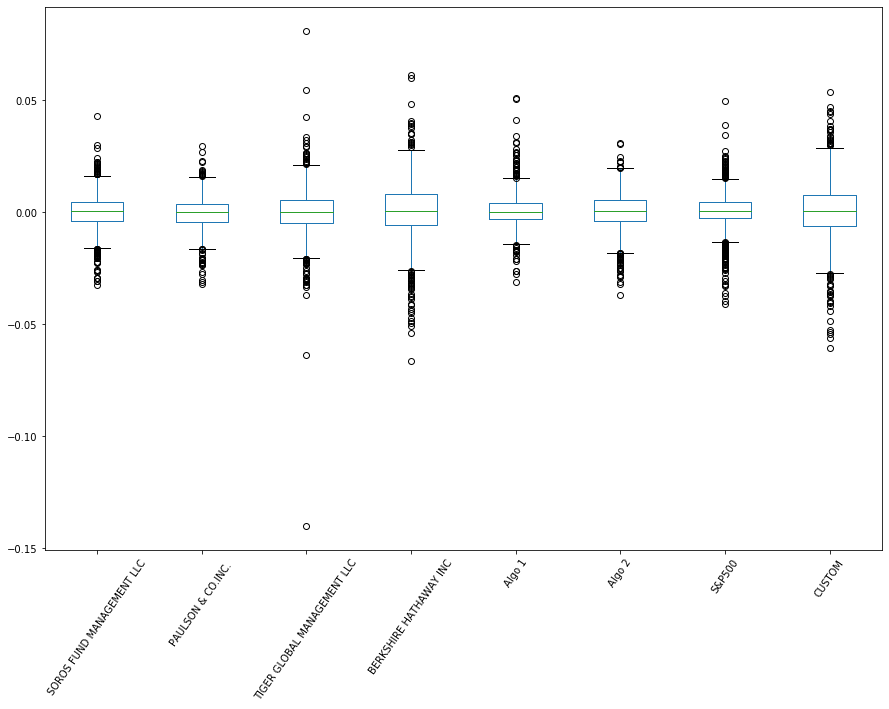

In [35]:
# Box plot to visually show risk
final_combined_df.boxplot(grid = False, rot = 55, figsize=(15,10))

In [36]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
final_df_std = final_combined_df.std().sort_values()
final_df_std

PAULSON & CO.INC.              0.007241
Algo 1                         0.007780
SOROS FUND MANAGEMENT LLC      0.008086
Algo 2                         0.008515
S&P500                         0.008672
TIGER GLOBAL MANAGEMENT LLC    0.011243
BERKSHIRE HATHAWAY INC         0.013334
CUSTOM                         0.013578
dtype: float64

In [37]:
# Calculate the annualized standard deviation (252 trading days)
final_volitility = final_combined_df.std() * np.sqrt(252)
final_volitility.sort_values(inplace = True)
final_volitility

PAULSON & CO.INC.              0.114944
Algo 1                         0.123510
SOROS FUND MANAGEMENT LLC      0.128355
Algo 2                         0.135167
S&P500                         0.137664
TIGER GLOBAL MANAGEMENT LLC    0.178473
BERKSHIRE HATHAWAY INC         0.211664
CUSTOM                         0.215542
dtype: float64

### How does risk of custom portfolio compare to others: 

In addtion to the Tiger Global and Berkshire Hathaway portfolios, the Custom portfolio also presents greater risk than the index.  Custom portfolio results in greater risk than all other portfolios included in the analysis.

## Rolling

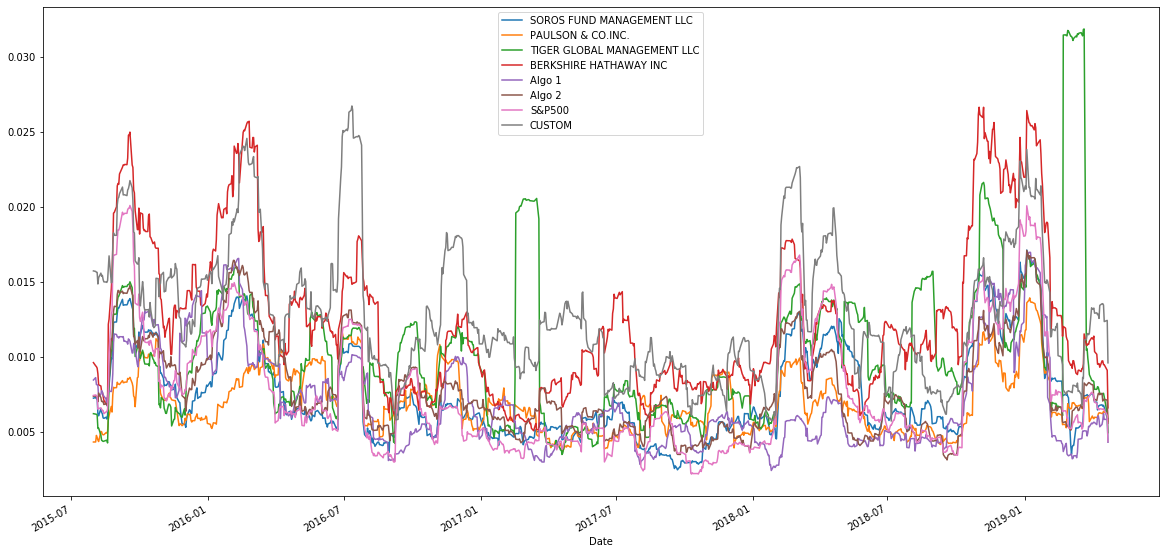

In [38]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
final_combined_rolling_std = final_combined_df.rolling(window = 21).std().plot(figsize=(20,10))

## Beta

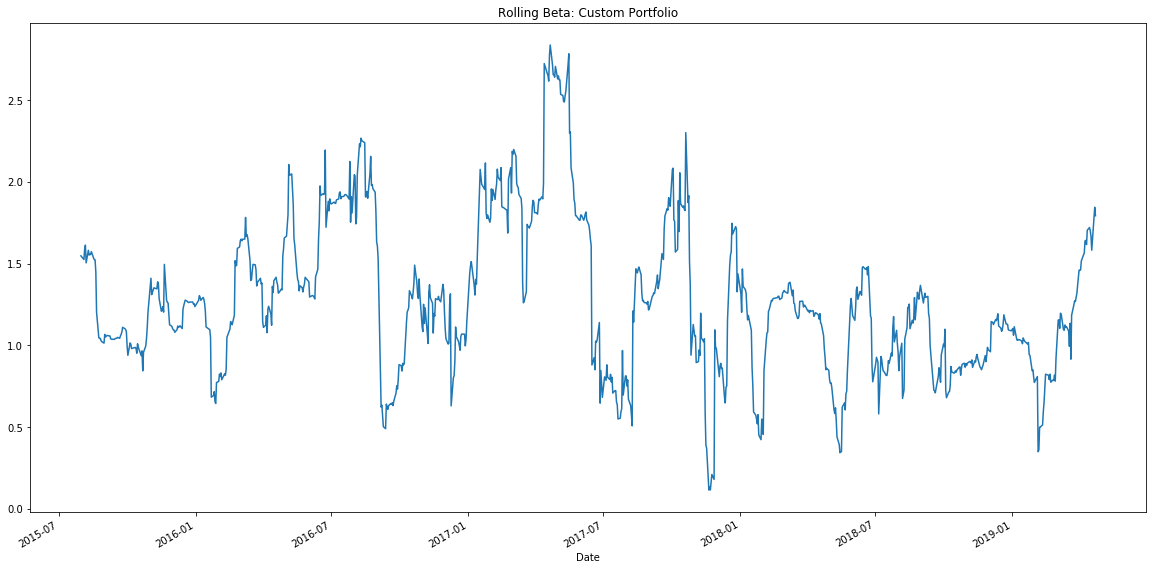

In [43]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)

# calculate rolling variance of custom portfolio
custom_rolling_covariance = final_combined_df['CUSTOM'].rolling(window = 21).cov(final_combined_df['S&P500'])

# calculate rolling varianc eof S&P 500
final_rolling_variance_sp500 = final_combined_df['S&P500'].rolling(window = 21).var()

# calculate rolling beta of custom portfolio compared to index
final_rolling_beta = custom_rolling_covariance / final_rolling_variance_sp500

#plot beta
final_rolling_beta.plot(figsize=(20, 10), title = 'Rolling Beta: Custom Portfolio')

---

## Annualized Sharpe Ratios

In [40]:
final_sharpe_ratios = (final_combined_df.mean() * np.sqrt(252) / final_combined_df.std()).sort_values()
final_sharpe_ratios

PAULSON & CO.INC.             -0.599403
TIGER GLOBAL MANAGEMENT LLC   -0.130694
SOROS FUND MANAGEMENT LLC      0.363265
Algo 2                         0.527451
CUSTOM                         0.603022
BERKSHIRE HATHAWAY INC         0.661717
S&P500                         0.728511
Algo 1                         1.459280
dtype: float64

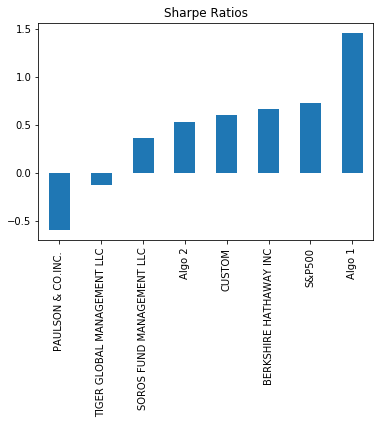

In [41]:
# Visualize the sharpe ratios as a bar plot
final_sharpe_ratios.plot(kind = 'bar', title = 'Sharpe Ratios')

### Is custom porfolio a better investment?

The custom porfolio is not a better investment compared to Algo which presents the best option considering risk.

---

## Include correlation analysis to determine which stocks (if any) are correlated

In [42]:
# Construct a correlation table
final_returns_correlation = final_combined_df.corr()
final_returns_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,CUSTOM
SOROS FUND MANAGEMENT LLC,1.000000,0.699850,0.554251,0.753518,0.327588,0.827250,0.839263,0.621517
PAULSON & CO.INC.,0.699850,1.000000,0.428078,0.543269,0.277653,0.679183,0.672579,0.521765
TIGER GLOBAL MANAGEMENT LLC,0.554251,0.428078,1.000000,0.416977,0.166323,0.497302,0.615751,0.426844
BERKSHIRE HATHAWAY INC,0.753518,0.543269,0.416977,1.000000,0.298148,0.686277,0.754805,0.520240
Algo 1,0.327588,0.277653,0.166323,0.298148,1.000000,0.300089,0.286865,0.206682
Algo 2,0.827250,0.679183,0.497302,0.686277,0.300089,1.000000,0.858527,0.698872
S&P500,0.839263,0.672579,0.615751,0.754805,0.286865,0.858527,1.000000,0.752986
CUSTOM,0.621517,0.521765,0.426844,0.520240,0.206682,0.698872,0.752986,1.000000


With regards to correlation to the index, Algo 2 remains the most correlated.  